## Pre-processing ##

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# importing necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pylab as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import *
from sklearn import metrics
from yellowbrick.regressor import PredictionError, ResidualsPlot

df = pd.read_csv('/content/drive/Shared drives/BA476/data/application_data.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# changing the categorical numbers 
# dropping sk_id_curr
df = df.drop(labels = "SK_ID_CURR", axis = 1)
df["DAYS_BIRTH"] = df["DAYS_BIRTH"]*-1
df["DAYS_EMPLOYED"] = df["DAYS_EMPLOYED"]*-1
df["DAYS_REGISTRATION"] = df["DAYS_REGISTRATION"]*-1
df["DAYS_LAST_PHONE_CHANGE"] = df["DAYS_LAST_PHONE_CHANGE"]*-1
df["DAYS_LAST_PHONE_CHANGE"] = df["DAYS_LAST_PHONE_CHANGE"]*-1
df["DAYS_LAST_PHONE_CHANGE"] = df["DAYS_LAST_PHONE_CHANGE"]*-1
df["DAYS_LAST_PHONE_CHANGE"] = df["DAYS_LAST_PHONE_CHANGE"]*-1
df["DAYS_LAST_PHONE_CHANGE"] = df["DAYS_LAST_PHONE_CHANGE"]*-1

In [4]:
#Dropping Mode and Medi columns
columns_to_drop = ['APARTMENTS_MODE',
'BASEMENTAREA_MODE',
'YEARS_BEGINEXPLUATATION_MODE',
'YEARS_BUILD_MODE',
'COMMONAREA_MODE',
'ELEVATORS_MODE',
'ENTRANCES_MODE',
'FLOORSMAX_MODE',
'FLOORSMIN_MODE',
'LANDAREA_MODE',
'LIVINGAPARTMENTS_MODE',
'LIVINGAREA_MODE',
'NONLIVINGAPARTMENTS_MODE',
'NONLIVINGAREA_MODE',
'APARTMENTS_MEDI',
'BASEMENTAREA_MEDI',
'YEARS_BEGINEXPLUATATION_MEDI',
'YEARS_BUILD_MEDI',
'COMMONAREA_MEDI',
'ELEVATORS_MEDI',
'ENTRANCES_MEDI',
'FLOORSMAX_MEDI',
'FLOORSMIN_MEDI',
'LANDAREA_MEDI',
'LIVINGAPARTMENTS_MEDI',
'LIVINGAREA_MEDI',
'NONLIVINGAPARTMENTS_MEDI',
'NONLIVINGAREA_MEDI',
'FONDKAPREMONT_MODE',
'HOUSETYPE_MODE',
'TOTALAREA_MODE',
'WALLSMATERIAL_MODE',
'EMERGENCYSTATE_MODE']
df.drop(columns_to_drop, inplace=True, axis=1)

In [5]:
#getting rid of really high income outliers
df = df[ df['AMT_INCOME_TOTAL'] < 700000 ]

In [6]:
cat_col = df.select_dtypes(object)
num_col = df.select_dtypes(np.number)
df.shape[1]

88

# Adding Dummies

In [7]:
# getting dummies for categorical columns
cat_col_dummies = pd.get_dummies(cat_col)

df_with_dummies = df.copy() # new df

# dropping all old cat columns
labels = list(cat_col.columns)
for l in labels:
  df_with_dummies.drop(labels=l, axis=1, inplace=True)

# adding in dummies 
df_with_dummies = df_with_dummies.join(cat_col_dummies)
df_with_dummies.head(15)

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,1,0,202500.000,406597.5,24700.5,351000.0,0.018801,9461,637,3648.0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,270000.000,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,67500.000,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,135000.000,312682.5,29686.5,297000.0,0.008019,19005,3039,9833.0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,121500.000,513000.0,21865.5,513000.0,0.028663,19932,3038,4311.0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,99000.000,490495.5,27517.5,454500.0,0.035792,16941,1588,4970.0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,171000.000,1560726.0,41301.0,1395000.0,0.035792,13778,3130,1213.0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,360000.000,1530000.0,42075.0,1530000.0,0.003122,18850,449,4597.0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,112500.000,1019610.0,33826.5,913500.0,0.018634,20099,-365243,7427.0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,135000.000,405000.0,20250.0,405000.0,0.019689,14469,2019,14437.0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#Function to calculate meta-data to identify % of data is missing in each column
def missingData_toPercent(data):
    total = data.isnull().sum()
    print(total)
    percent = (data.isnull().sum()/data.isnull().count()*100)
    unique = data.nunique()
    datatypes = data.dtypes
    return pd.concat([total, percent, unique, datatypes], axis=1, keys=['Total', 'Percent', 'Unique', 'Data_Type']).sort_values(by="Percent", ascending=False)

In [9]:
# checking percentage of nan values 
missing_values_percentage_df_dummies = missingData_toPercent(df_with_dummies)
missing_values_percentage_df_dummies.head(20)

TARGET                                  0
CNT_CHILDREN                            0
AMT_INCOME_TOTAL                        0
AMT_CREDIT                              0
AMT_ANNUITY                            12
                                       ..
ORGANIZATION_TYPE_Transport: type 2     0
ORGANIZATION_TYPE_Transport: type 3     0
ORGANIZATION_TYPE_Transport: type 4     0
ORGANIZATION_TYPE_University            0
ORGANIZATION_TYPE_XNA                   0
Length: 200, dtype: int64


,Total,Percent,Unique,Data_Type
COMMONAREA_AVG,214462,69.909021,3166,float64
NONLIVINGAPARTMENTS_AVG,213119,69.471238,385,float64
LIVINGAPARTMENTS_AVG,209813,68.393568,1861,float64
FLOORSMIN_AVG,208262,67.887982,303,float64
YEARS_BUILD_AVG,204127,66.540080,149,float64
OWN_CAR_AGE,202681,66.068722,62,float64
LANDAREA_AVG,182270,59.415268,3523,float64
BASEMENTAREA_AVG,179658,58.563824,3777,float64
EXT_SOURCE_1,173021,56.400335,114310,float64
NONLIVINGAREA_AVG,169413,55.224221,3276,float64


In [10]:
# making new df with columns with more than 60% NaN
drop_columns = list(missing_values_percentage_df_dummies[missing_values_percentage_df_dummies["Percent"] > 60].index)
df_with_dummies_drop_nan = df_with_dummies.drop(labels = drop_columns, axis = 1) # dropped 16 columns
df_with_dummies_drop_nan

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,3648.0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,1186.0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,4260.0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,9833.0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,4311.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,9327,236,8456.0,...,0,0,0,0,0,0,0,0,0,0
307507,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,20775,-365243,4388.0,...,0,0,0,0,0,0,0,0,0,1
307508,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,14966,7921,6737.0,...,0,0,0,0,0,0,0,0,0,0
307509,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,11961,4786,2562.0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# df with only drop columns 
drop_columns_df = df_with_dummies[drop_columns + ["TARGET"]]
drop_columns_df

,COMMONAREA_AVG,NONLIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_AVG,FLOORSMIN_AVG,YEARS_BUILD_AVG,OWN_CAR_AGE,TARGET
0,0.0143,0.0000,0.0202,0.1250,0.6192,NaN,1
1,0.0605,0.0039,0.0773,0.3333,0.7960,NaN,0
2,NaN,NaN,NaN,NaN,NaN,26.0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,0
4,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...
307506,0.0202,0.0753,0.1484,0.2708,0.8300,NaN,0
307507,0.0022,0.0000,0.0202,0.1250,0.6260,NaN,0
307508,0.0123,0.0000,0.0841,0.2083,0.7484,NaN,0
307509,NaN,NaN,NaN,NaN,NaN,NaN,1


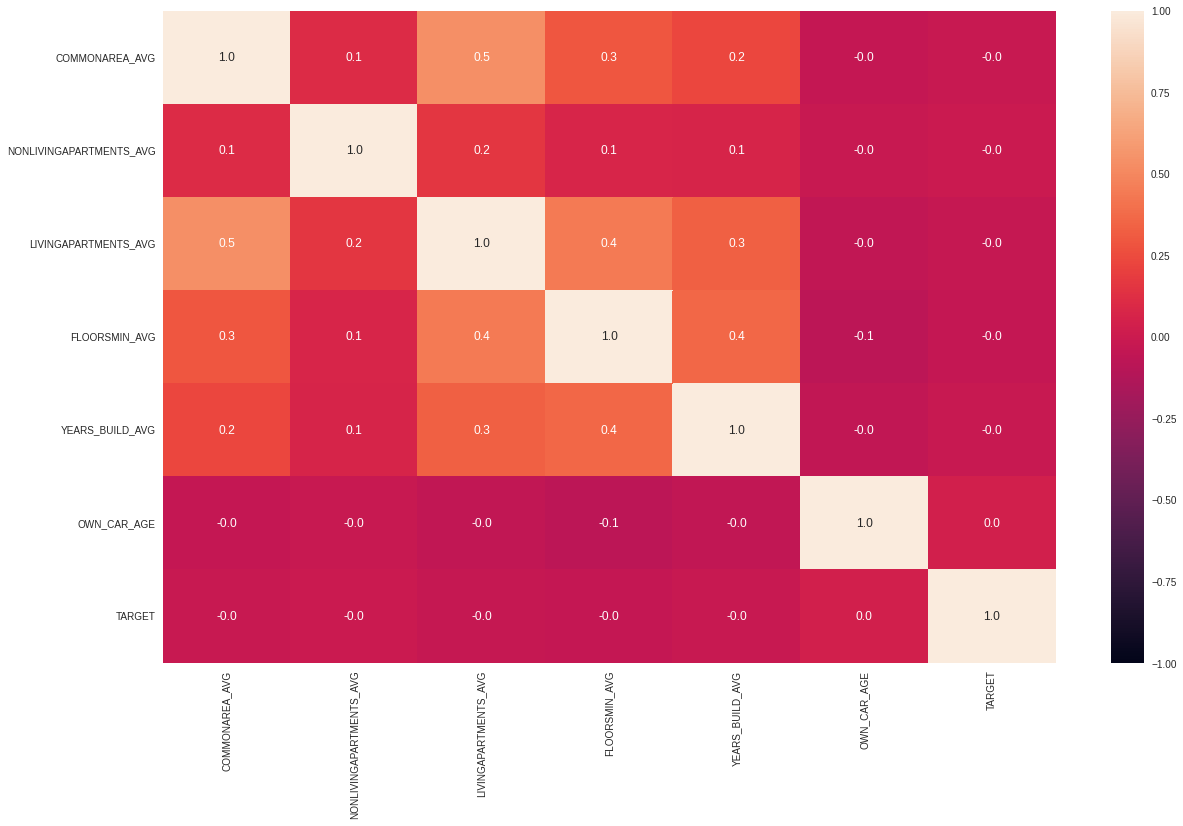

In [12]:
# heat map with df with only dropped columns
drop_columns_corr = drop_columns_df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(drop_columns_corr, annot=True, fmt = '.1f', vmin = -1, vmax = 1)

# Filling in NaN values


In [13]:
for c in df_with_dummies_drop_nan.columns:
  df_with_dummies_drop_nan[c].fillna(value = df_with_dummies_drop_nan[c].mean(), inplace=True)
df_with_dummies_drop_nan.isna().sum()

TARGET                                 0
CNT_CHILDREN                           0
AMT_INCOME_TOTAL                       0
AMT_CREDIT                             0
AMT_ANNUITY                            0
                                      ..
ORGANIZATION_TYPE_Transport: type 2    0
ORGANIZATION_TYPE_Transport: type 3    0
ORGANIZATION_TYPE_Transport: type 4    0
ORGANIZATION_TYPE_University           0
ORGANIZATION_TYPE_XNA                  0
Length: 194, dtype: int64

# Heatmaps of dropped null columns

In [14]:
# # heat map with df without dropped columns 0-30
# df_corr = df_without_target.iloc[:,:31].join(df_with_dummies_drop_nan["TARGET"])
# df_corr_30 = df_corr.corr()
# plt.figure(figsize=(20,12))
# plt.title("Correlation Matrix with 30 Predictors")
# sns.heatmap(df_corr_30, annot=True, fmt = '.1f', vmin = -1, vmax = 1)

In [15]:
# # heat map with df without dropped columns 31-60
# df_corr = df_without_target.iloc[:, 31:61].join(df_with_dummies_drop_nan["TARGET"])
# df_corr_60 = df_corr.corr()
# plt.figure(figsize=(20,12))
# plt.title("Correlation Matrix with 30-60 Predictors")
# sns.heatmap(df_corr_60, annot=True, fmt = '.1f', vmin = -1, vmax = 1)

In [16]:
# # heat map with df without dropped columns 61-90
# df_corr = df_without_target.iloc[:, 61:89].join(df_with_dummies_drop_nan["TARGET"])
# df_corr_90 = df_corr.corr()
# plt.figure(figsize=(20,12))
# plt.title("Correlation Matrix with 60-90 Predictors")
# sns.heatmap(df_corr_90, annot=True, fmt = '.1f', vmin = -1, vmax = 1)

In [17]:
# # heat map with df without dropped columns 90-120
# df_corr = df_without_target.iloc[:, 91:121].join(df_with_dummies_drop_nan["TARGET"])
# df_corr_120 = df_corr.corr()
# plt.figure(figsize=(20,12))
# plt.title("Correlation Matrix with 90-120 Predictors")
# sns.heatmap(df_corr_120, annot=True, fmt = '.1f', vmin = -1, vmax = 1)

In [18]:
# # heat map with df without dropped columns 120-150
# df_corr = df_without_target.iloc[:, 121:151].join(df_with_dummies_drop_nan["TARGET"])
# df_corr_150 = df_corr.corr()
# plt.figure(figsize=(20,12))
# plt.title("Correlation Matrix with 120-150 Predictors")
# sns.heatmap(df_corr_150, annot=True, fmt = '.1f', vmin = -1, vmax = 1)

In [19]:
# # heat map with df without dropped columns 150-180
# df_corr = df_without_target.iloc[:, 151:181].join(df_with_dummies_drop_nan["TARGET"])
# df_corr_180 = df_corr.corr()
# plt.figure(figsize=(20,12))
# plt.title("Correlation Matrix with 150-180 Predictors")
# sns.heatmap(df_corr_180, annot=True, fmt = '.1f', vmin = -1, vmax = 1)

In [20]:
# # heat map with df without dropped columns 180-210
# df_corr = df_without_target.iloc[:, 181:211].join(df_with_dummies_drop_nan["TARGET"])
# df_corr_210 = df_corr.corr()
# plt.figure(figsize=(20,12))
# plt.title("Correlation Matrix with 180-210 Predictors")
# sns.heatmap(df_corr_210, annot=True, fmt = '.1f', vmin = -1, vmax = 1)

In [21]:
# # heat map with df without dropped columns 210-229
# df_corr = df_without_target.iloc[:, 211:230].join(df_with_dummies_drop_nan["TARGET"])
# df_corr_229 = df_corr.corr()
# plt.figure(figsize=(20,12))
# plt.title("Correlation Matrix with 210-229 Predictors")
# sns.heatmap(df_corr_229, annot=True, fmt = '.1f', vmin = -1, vmax = 1)

# NearMiss Sampling / Feature Engineering

In [22]:
official_df = df_with_dummies_drop_nan.sample(n=20000)

In [23]:
y = official_df["TARGET"]
X = official_df.drop(labels="TARGET", axis=1)

In [24]:
official_df['threshold'] = official_df['AMT_CREDIT'] / official_df['AMT_INCOME_TOTAL']

conditions = [(official_df['threshold'] <= 1),    
                (official_df['threshold'] > 1) & (official_df['threshold'] <= 1.5),
              (official_df['threshold'] > 1.5) & (official_df['threshold'] <= 2),
              (official_df['threshold'] > 2) & (official_df['threshold'] <= 2.5) ,
              (official_df['threshold'] > 2.5) & (official_df['threshold'] <= 3) ,
              (official_df['threshold'] > 3) & (official_df['threshold'] <= 4) ,
              (official_df['threshold'] > 4) & (official_df['threshold'] <= 5) ,
              (official_df['threshold'] > 5)       
]

choices = [1,2,3,4,5,6,7,8]

official_df['risk_rating'] = np.select(conditions, choices)

In [25]:
official_df.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,threshold,risk_rating
273670,0,0,90000.0,545040.0,19705.5,450000.0,0.008866,19773,12719,7386.0,...,0,0,0,0,0,0,0,0,6.056000,8
44635,0,1,76500.0,360000.0,15988.5,360000.0,0.030755,13678,1730,7806.0,...,0,0,0,0,0,0,0,0,4.705882,7
207824,0,0,135000.0,592560.0,32274.0,450000.0,0.019101,16099,1124,6167.0,...,0,0,0,0,0,0,0,0,4.389333,7
91732,0,0,112500.0,468000.0,23773.5,468000.0,0.010276,18511,2700,5927.0,...,1,0,0,0,0,0,0,0,4.160000,7
35418,0,0,225000.0,1190340.0,66595.5,1125000.0,0.020713,19340,1368,4602.0,...,0,0,0,0,0,0,0,0,5.290400,8


In [26]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss
nm = NearMiss(sampling_strategy=0.3)
X_under, y_under = nm.fit_resample(X, y)

In [27]:
# from imblearn.over_sampling import SMOTE #SMOTE BAD
# sm = SMOTE(random_state=42)
# X_res2, y_res2 = sm.fit_resample(X, y)

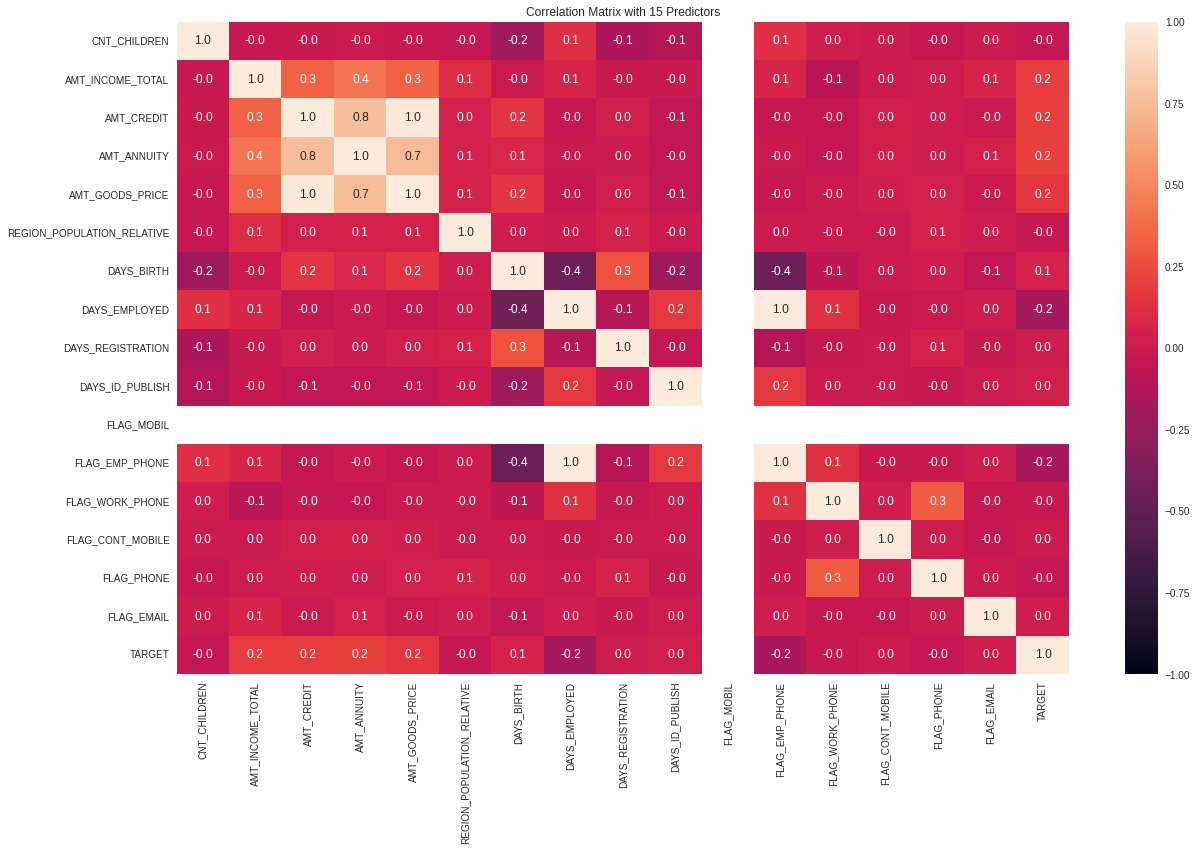

In [28]:
df_corr = X_under.iloc[:,:16].join(y_under)
df_corr_30 = df_corr.corr()
plt.figure(figsize=(20,12))
plt.title("Correlation Matrix with 15 Predictors")
sns.heatmap(df_corr_30, annot=True, fmt = '.1f', vmin = -1, vmax = 1)

PCA 

In [29]:
# from sklearn.decomposition import PCA
# from sklearn import preprocessing
# pca_df_scaled = preprocessing.scale(official_df)
# pcs = PCA(n_components=40)
# pcs.fit(pca_df_scaled)
# pcsSummary_df = pd.DataFrame({
#             '% of variance explained': pcs.explained_variance_ratio_,
#             'Cumulative % explained': np.cumsum(pcs.explained_variance_ratio_)
#              })
# pcsSummary_df.round(3)

In [30]:
# pcs_df = pd.DataFrame(pcs.components_).round(2).transpose()
# var = list(official_df.columns)
# pcs_df.index = [var]
# pcs_df.head(50)

In [31]:
# pd.DataFrame(pcs.components_.transpose(), index=[var]).round(2)
# eig=pcs.explained_variance_.round(2)
# print(eig)

In [32]:
# xvals = np.arange(1,41,step=1);

# plt.figure(figsize=(10,5))

# plt.plot(xvals, eig, 'ro-', linewidth=1)

# plt.xticks(xvals)

# plt.title('Scree Plot')
# plt.xlabel('Principal Component')
# plt.ylabel('Eigenvalue')

# plt.axhline(y=1, color='b', linestyle='--')

In [33]:
# pcs = PCA(n_components=20)
# principalComponents = pcs.fit_transform(pca_df_scaled)
# principalDF = pd.DataFrame(
#         principalComponents.round(3), 
#         columns = ['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14','F15','F16','F17','F18','F19','F20']
#         )
# principalDF

In [34]:
# principalDF.corr().round(4)

# Split into train/test + Baseline Visualization

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler_norm = MinMaxScaler(feature_range = (0,1))
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size = 0.2, random_state = 1)
scaler = StandardScaler() 
X_std_train = scaler.fit_transform(X_train)
X_std_test = scaler.fit_transform(X_test)
X_std_train = scaler_norm.fit_transform(X_train)
X_std_test = scaler_norm.fit_transform(X_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Baseline Visualization')

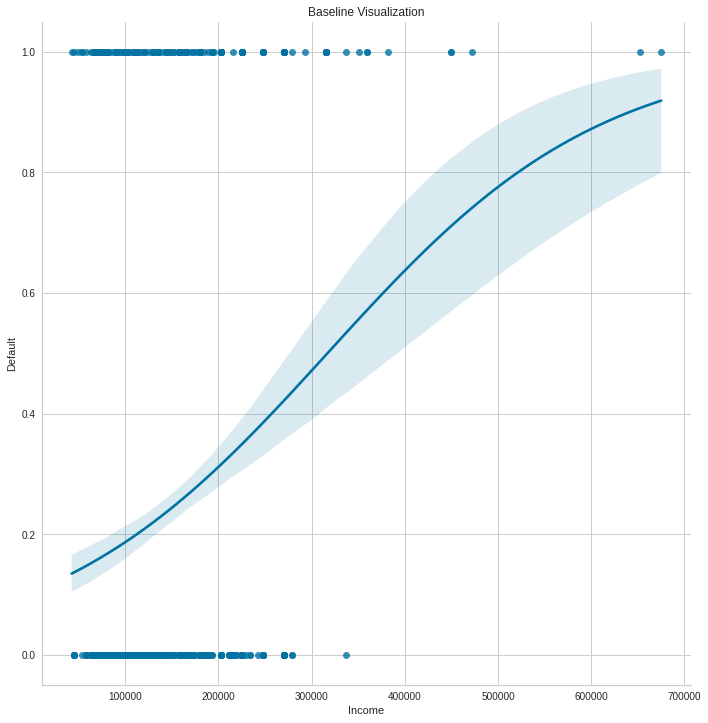

In [36]:
#Baseline Visualization
income = pd.DataFrame(X_test['AMT_INCOME_TOTAL'])

income['Default'] = y_test
xy = income
xy.columns = ['Income', 'Default']

g = sns.lmplot(x='Income', y='Default', data=xy, logistic=True, height=10)
plt.title("Baseline Visualization")

# Logistic Regression

In [37]:
# Logistic regression test
lr = LogisticRegression(max_iter=1000, penalty ='none')
lr.fit(X_std_train, y_train)

lr_y_train_pred = lr.predict(X_std_train) 
lr_y_test_pred = lr.predict(X_std_test)

lr_train_accuracy_score = accuracy_score(y_train, lr_y_train_pred)
lr_test_accuracy_score = accuracy_score(y_test, lr_y_test_pred)

print("LR Training set accuracy: ", lr_train_accuracy_score)
print("LR Test set accuracy: ", lr_test_accuracy_score)

LR Training set accuracy:  0.8099086437104709
LR Test set accuracy:  0.7947997189037245


Text(0.5, 1.0, 'Logistic Regression Test Accuracy Score: 0.7947997189037245')

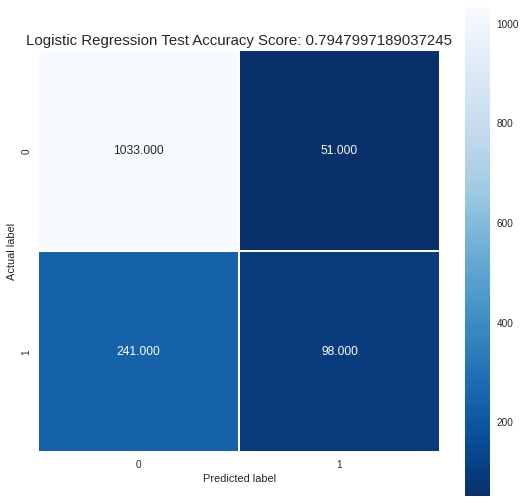

In [38]:
#Logisitic Regression Confusion Matrix
lr_cm = metrics.confusion_matrix(y_test, lr_y_test_pred)

plt.figure(figsize=(9,9))
sns.heatmap(lr_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Logistic Regression Test Accuracy Score: {0}'.format(lr_test_accuracy_score)
plt.title(all_sample_title, size = 15)

In [39]:
#Logistic Regression CV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

distributions = dict(max_iter=[50,100,200,300,400,1000],penalty=['none'])
clf = RandomizedSearchCV(lr, distributions, scoring='accuracy', random_state=0)
search = clf.fit(X_std_train, y_train)
cv_params = search.best_params_
max_iter_cv = cv_params.get('max_iter')
penalty_cv = cv_params.get('penalty')

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the dat

In [40]:
# Logistic regression with CV parameters
lr = LogisticRegression(max_iter=max_iter_cv, penalty =penalty_cv)
lr.fit(X_std_train, y_train)

lr_y_train_pred = lr.predict(X_std_train) 
lr_y_test_pred = lr.predict(X_std_test)

lr_train_accuracy_score = accuracy_score(y_train, lr_y_train_pred)
lr_test_accuracy_score = accuracy_score(y_test, lr_y_test_pred)

print("LR Training set accuracy: ", lr_train_accuracy_score)
print("LR Test set accuracy: ", lr_test_accuracy_score)

LR Training set accuracy:  0.8099086437104709
LR Test set accuracy:  0.7947997189037245


Text(0.5, 1.0, 'Logistic Regression CV Test Accuracy Score: 0.7947997189037245')

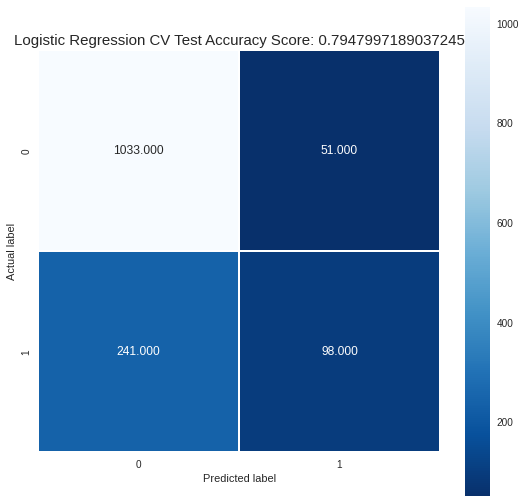

In [41]:
# LR CV confusion matrix
lr_cm = metrics.confusion_matrix(y_test, lr_y_test_pred)

plt.figure(figsize=(9,9))
sns.heatmap(lr_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Logistic Regression CV Test Accuracy Score: {0}'.format(accuracy_score(y_test, lr_y_test_pred))
plt.title(all_sample_title, size = 15)

# LR Visualization

Text(0.5, 1.0, 'Logistic Regression - Test')

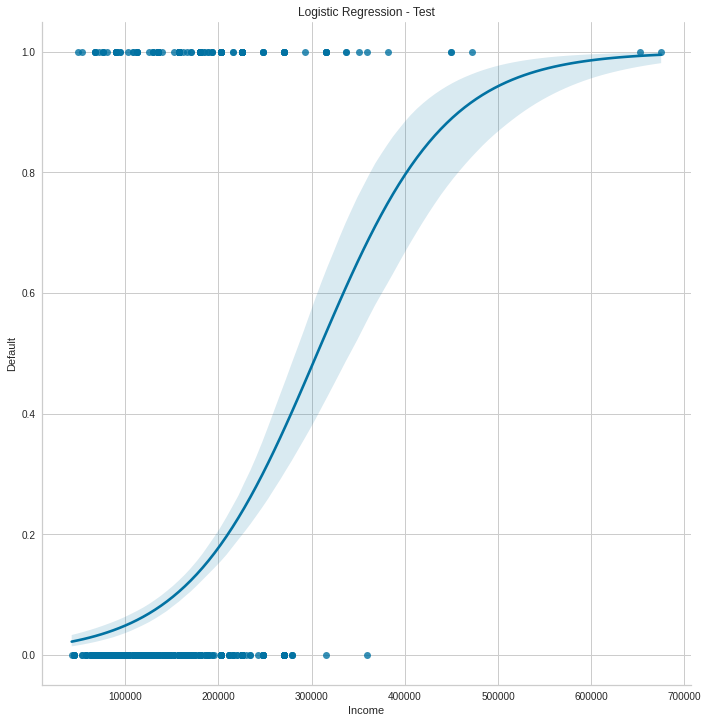

In [42]:
#Test LR Visualization
income = pd.DataFrame(X_test['AMT_INCOME_TOTAL'])

income['Default'] = lr_y_test_pred
xy = income
xy.columns = ['Income', 'Default']

g = sns.lmplot(x='Income', y='Default', data=xy, logistic=True, height=10)
plt.title("Logistic Regression - Test")

In [43]:
y_test

5930    1
2441    0
5028    0
1564    0
5213    0
       ..
2202    0
5581    1
101     0
3068    0
3830    0
Name: TARGET, Length: 1423, dtype: int64

# Bagging

In [44]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import mean_squared_error
from IPython.display import clear_output, display
from scipy.stats import randint
from scipy.stats import uniform


In [45]:
num_trees = 30 
max_depth = 10

regr_1 = BaggingClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=max_depth),
        n_estimators=num_trees
)
regr_1.fit(X_std_train, y_train)

bagging_y_test_pred = regr_1.predict(X_std_test)
bagging_y_train_pred = regr_1.predict(X_std_train)

print('Bagging Train Accuracy: ', accuracy_score(y_train, bagging_y_train_pred))
print('Bagging Test Accuracy: ', accuracy_score(y_test, bagging_y_test_pred))

Bagging Train Accuracy:  0.8817638791286015
Bagging Test Accuracy:  0.7427969079409698


Text(0.5, 1.0, 'Bagging Test Accuracy Score: 0.7427969079409698')

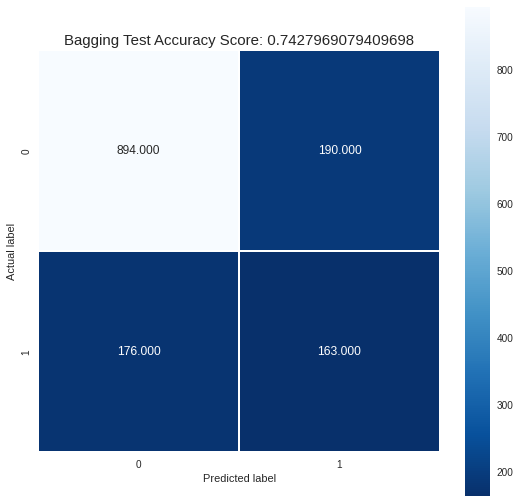

In [46]:
# creating the Bagging confusion matrix 
bagging_cm = metrics.confusion_matrix(y_test, bagging_y_test_pred)

plt.figure(figsize=(9,9))
sns.heatmap(bagging_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Bagging Test Accuracy Score: {0}'.format(accuracy_score(y_test, bagging_y_test_pred))
plt.title(all_sample_title, size = 15)

In [47]:
#Bagging CV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_samples' : [0.05, 0.1, 0.2, 0.5, 0.8, 1, 2, 3, 4],
    'n_estimators' : [25,30,40,50]
}

# clf = RandomizedSearchCV(lr, distributions, scoring='accuracy', random_state=0)

clf_bagging = RandomizedSearchCV(regr_1, param_grid, scoring='accuracy')

search_bagging = clf_bagging.fit(X_std_train, y_train)
cv_params=search_bagging.best_params_
n_estimators_cv = cv_params.get('n_estimators')
max_samples_cv = cv_params.get('max_samples')

In [48]:
# Bagging with CV paramaters

regr_1 = BaggingClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=max_depth),
        n_estimators=n_estimators_cv,
        max_samples= max_samples_cv
)
regr_1.fit(X_std_train, y_train)

bagging_y_test_pred = regr_1.predict(X_std_test)
bagging_y_train_pred = regr_1.predict(X_std_train)

print('Bagging Train Accuracy: ', accuracy_score(y_train, bagging_y_train_pred))
print('Bagging Test Accuracy: ', accuracy_score(y_test, bagging_y_test_pred))

Bagging Train Accuracy:  0.8663035839775123
Bagging Test Accuracy:  0.7744202389318342


Text(0.5, 1.0, 'Bagging CV Test Accuracy Score: 0.7744202389318342')

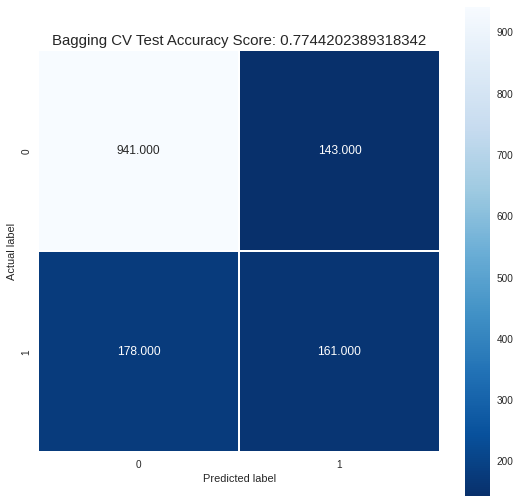

In [49]:
# Bagging CV confusion matrix
bagging_cm = metrics.confusion_matrix(y_test, bagging_y_test_pred)

plt.figure(figsize=(9,9))
sns.heatmap(bagging_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Bagging CV Test Accuracy Score: {0}'.format(accuracy_score(y_test, bagging_y_test_pred))
plt.title(all_sample_title, size = 15)

# Boosting

In [50]:
residuals = y_train
model = AdaBoostClassifier(n_estimators=50)
model.fit(X_std_train, residuals)
boosting_y_test_pred = model.predict(X_std_test)
boosting_y_train_pred = model.predict(X_std_train)

print('Boosting Train accuracy: ',accuracy_score(y_train, boosting_y_train_pred))
print('Boosting Test accuracy: ', accuracy_score(y_test, boosting_y_test_pred))

Boosting Train accuracy:  0.8315179198875615
Boosting Test accuracy:  0.707659873506676


Text(0.5, 1.0, 'Boosting Test Accuracy Score: 0.707659873506676')

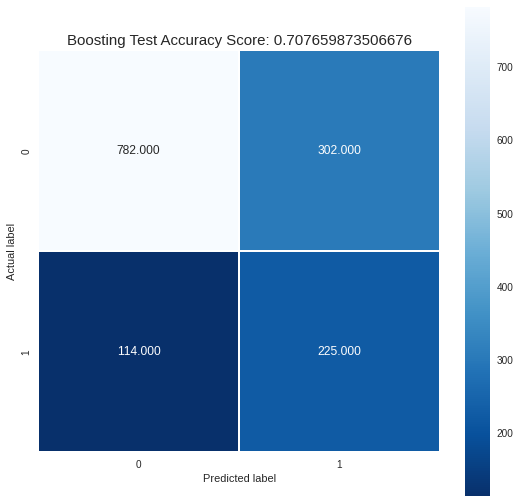

In [51]:
# Boosting confusion matrix 
boosting_cm = metrics.confusion_matrix(y_test, boosting_y_test_pred)

plt.figure(figsize=(9,9))
sns.heatmap(boosting_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Boosting Test Accuracy Score: {0}'.format(accuracy_score(y_test, boosting_y_test_pred))
plt.title(all_sample_title, size = 15)

In [52]:
# Boosting CV

param_grid = {
    'learning_rate' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
    'n_estimators' : [40,50,60,70,80,90,100]
}


clf_boosting = RandomizedSearchCV(AdaBoostClassifier(),param_grid, cv= 5, random_state = 42)

search_boosting = clf_boosting.fit(X_std_train, y_train)

cv_params=search_boosting.best_params_
n_estimators_cv = cv_params.get('n_estimators')
learning_rate_cv = cv_params.get('learning_rate')

In [53]:
# boosting with cv parameters
residuals = y_train
model = AdaBoostClassifier(n_estimators=n_estimators_cv, learning_rate=learning_rate_cv)
model.fit(X_std_train, residuals)
boosting_y_test_pred = model.predict(X_std_test)
boosting_y_train_pred = model.predict(X_std_train)

print('Boosting Train accuracy: ',accuracy_score(y_train, boosting_y_train_pred))
print('Boosting Test accuracy: ', accuracy_score(y_test, boosting_y_test_pred))

Boosting Train accuracy:  0.833977512297962
Boosting Test accuracy:  0.7167955024595924


Text(0.5, 1.0, 'Boosting CV Test Accuracy Score: 0.7167955024595924')

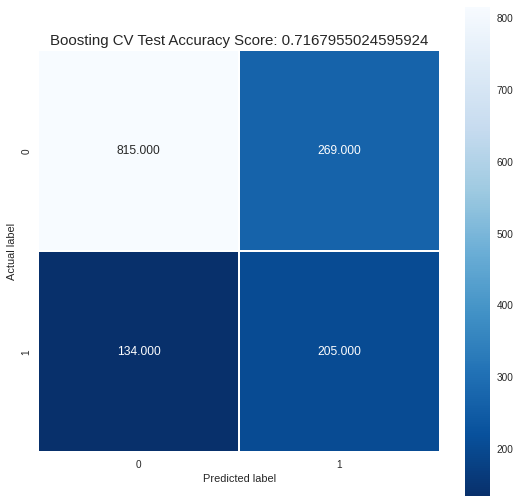

In [54]:
# Boosting CV confusion matrix
boosting_cv_cm = metrics.confusion_matrix(y_test, boosting_y_test_pred)

plt.figure(figsize=(9,9))
sns.heatmap(boosting_cv_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Boosting CV Test Accuracy Score: {0}'.format(accuracy_score(y_test, boosting_y_test_pred))
plt.title(all_sample_title, size = 15)

# Lasso, Ridge, Elastic Net

In [93]:
# Lasso - Classification
lasso = LogisticRegression(solver = "liblinear", penalty="l1", max_iter=1000)
lasso.fit(X_std_train, y_train)

lasso_y_train_pred = lasso.predict(X_std_train) 
lasso_y_test_pred = lasso.predict(X_std_test)

lasso_train_accuracy_score = accuracy_score(y_train, lasso_y_train_pred)
lasso_test_accuracy_score = accuracy_score(y_test, lasso_y_test_pred)


print("Lasso Training set accuracy: ", lasso_train_accuracy_score)
print("Lasso Test set accuracy: ", lasso_test_accuracy_score)

Lasso Training set accuracy:  0.806570625439213
Lasso Test set accuracy:  0.7997189037245257


Text(0.5, 1.0, 'Lasso Test Accuracy Score: 0.7997189037245257')

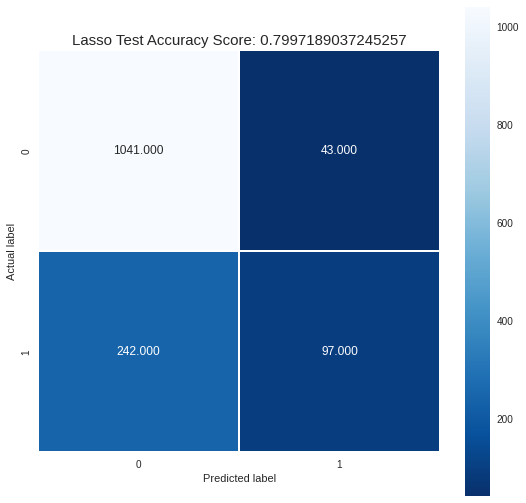

In [94]:
# Lasso confusion matrix 
lasso_cm = metrics.confusion_matrix(y_test, lasso_y_test_pred)

plt.figure(figsize=(9,9))
sns.heatmap(lasso_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Lasso Test Accuracy Score: {0}'.format(accuracy_score(y_test, lasso_y_test_pred))
plt.title(all_sample_title, size = 15)

In [57]:
#Lasso CV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

distributions_lasso= dict(C=[.00001, .0001, .001, .01, .1, 1, 2, 5, 10, 100],penalty=['l1'], max_iter=[10,100,500,1000])
clf_lasso = RandomizedSearchCV(lasso, distributions_lasso, random_state=0)
search_lasso = clf_lasso.fit(X_std_train, y_train)

cv_params=search_lasso.best_params_
C_cv = cv_params.get('C')
penalty_cv = cv_params.get('penalty')
max_iter_cv = cv_params.get('max_iter')

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

In [58]:
#Lasso with CV
lasso_best_cv = LogisticRegression(C = C_cv, solver = "liblinear", penalty=penalty_cv, max_iter=max_iter_cv)
lasso_best_cv.fit(X_std_train, y_train)

lasso_best_cv_y_train_pred = lasso_best_cv.predict(X_std_train) 
lasso_best_cv_y_test_pred = lasso_best_cv.predict(X_std_test)

lasso_best_cv_train_accuracy_score = accuracy_score(y_train, lasso_best_cv_y_train_pred)
lasso_best_cv_test_accuracy_score = accuracy_score(y_test, lasso_best_cv_y_test_pred)

print("Lasso Training set accuracy: ", lasso_best_cv_train_accuracy_score)
print("Lasso Test set accuracy: ", lasso_best_cv_test_accuracy_score)

Lasso Training set accuracy:  0.8067463106113844
Lasso Test set accuracy:  0.8004216444132115


Text(0.5, 1.0, 'Lasso CV Test Accuracy Score: 0.8004216444132115')

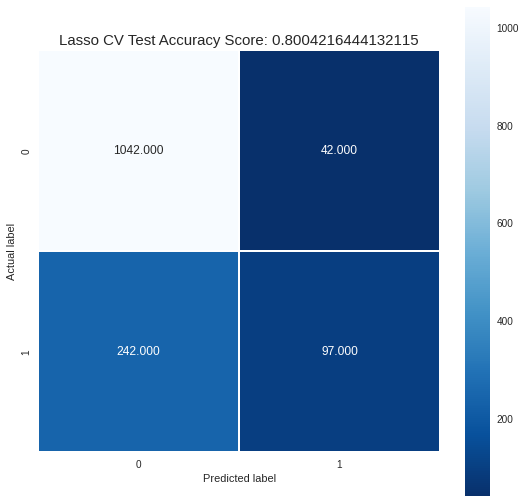

In [59]:
# Lasso CV confusion matrix
lasso_best_cv_cm = metrics.confusion_matrix(y_test, lasso_best_cv_y_test_pred)

plt.figure(figsize=(9,9))
sns.heatmap(lasso_best_cv_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Lasso CV Test Accuracy Score: {0}'.format(accuracy_score(y_test, lasso_best_cv_y_test_pred))
plt.title(all_sample_title, size = 15)

Text(0.5, 1.0, 'Lasso')

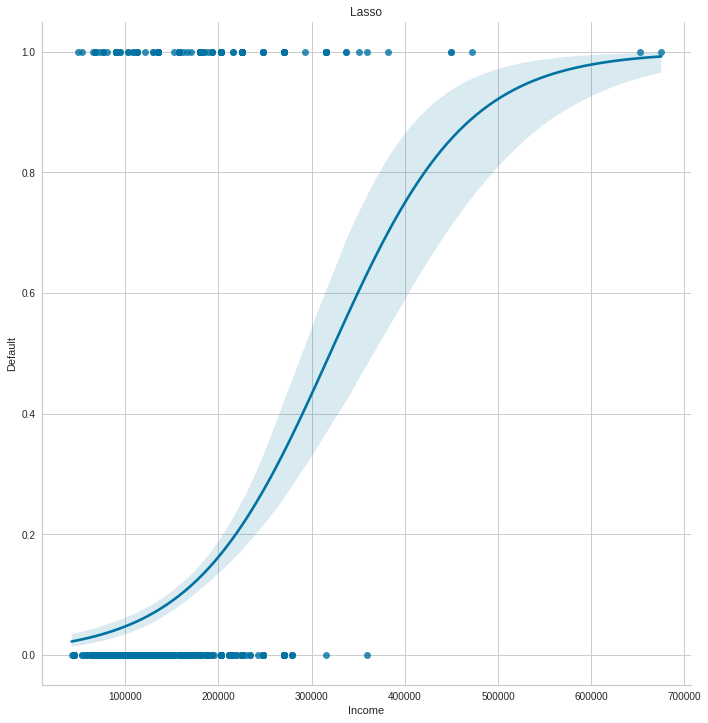

In [60]:
#Lasso Visualization
income = pd.DataFrame(X_test['AMT_INCOME_TOTAL'])

income['Default'] = lasso_best_cv_y_test_pred
xy = income
xy.columns = ['Income', 'Default']

g = sns.lmplot(x='Income', y='Default', data=xy, logistic=True, height=10)
plt.title("Lasso")

In [61]:
# Ridge - Classification
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier(alpha=0.01)
ridge.fit(X_std_train, y_train)

ridge_y_test_pred = ridge.predict(X_std_test)
ridge_y_train_pred = ridge.predict(X_std_train)

ridge_train_accuracy_score = accuracy_score(y_train, ridge_y_train_pred)
ridge_test_accuracy_score = accuracy_score(y_test, ridge_y_test_pred)

print("Ridge Train Accuracy: ", ridge_train_accuracy_score)
print("Ridge Test Accuracy: " , ridge_test_accuracy_score)

Ridge Train Accuracy:  0.8067463106113844
Ridge Test Accuracy:  0.7955024595924104


Text(0.5, 1.0, 'Ridge Test Accuracy Score: 0.7955024595924104')

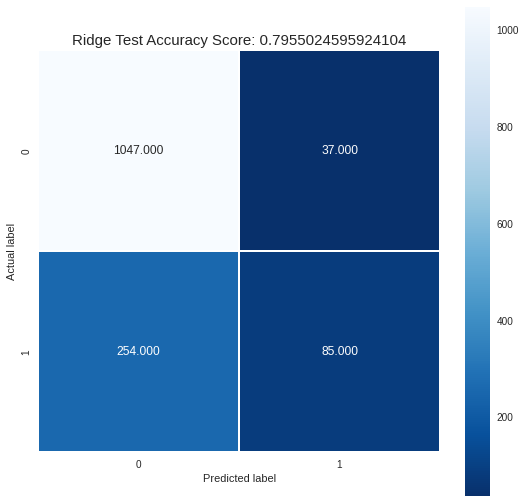

In [92]:
# Ridge confusion matrix 
ridge_cm = metrics.confusion_matrix(y_test, ridge_y_test_pred)

plt.figure(figsize=(9,9))
sns.heatmap(ridge_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Ridge Test Accuracy Score: {0}'.format(accuracy_score(y_test, ridge_y_test_pred))
plt.title(all_sample_title, size = 15)

In [63]:
#Ridge CV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

distributions_ridge = dict(alpha=[0.001, 0.01, 0.1, 1])
clf_es = RandomizedSearchCV(ridge, distributions_ridge, random_state=0)
search_ridge = clf_es.fit(X_std_train, y_train)

cv_params=search_ridge.best_params_
alpha_cv = cv_params.get('alpha')

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


In [64]:
#Ridge with CV
ridge_cv = RidgeClassifier(alpha=alpha_cv)
ridge_cv.fit(X_std_train, y_train)

ridge_cv_y_test_pred = ridge_cv.predict(X_std_test)
ridge_cv_y_train_pred = ridge_cv.predict(X_std_train)

ridge_cv_train_accuracy_score = accuracy_score(y_train, ridge_cv_y_train_pred)
ridge_cv_test_accuracy_score = accuracy_score(y_test, ridge_cv_y_test_pred)

print("Ridge Train Accuracy: ", ridge_cv_train_accuracy_score)
print("Ridge Test Accuracy: " , ridge_cv_test_accuracy_score)

Ridge Train Accuracy:  0.8076247364722418
Ridge Test Accuracy:  0.7969079409697821


Text(0.5, 1.0, 'Ridge CV Test Accuracy Score: 0.7969079409697821')

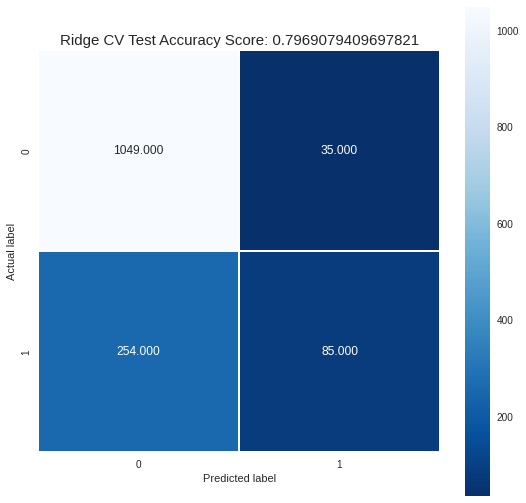

In [65]:
# Ridge CV confusion matrix
ridge_cv_cm = metrics.confusion_matrix(y_test, ridge_cv_y_test_pred)

plt.figure(figsize=(9,9))
sns.heatmap(ridge_cv_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Ridge CV Test Accuracy Score: {0}'.format(accuracy_score(y_test, ridge_cv_y_test_pred))
plt.title(all_sample_title, size = 15)

Text(0.5, 1.0, 'Ridge')

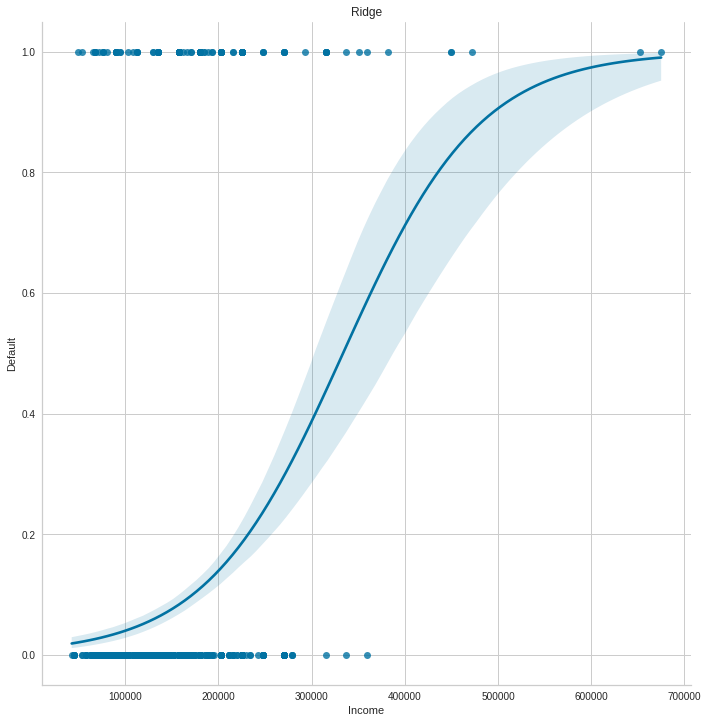

In [66]:
#Ridge Visualization
income = pd.DataFrame(X_test['AMT_INCOME_TOTAL'])

income['Default'] = ridge_cv_y_test_pred
xy = income
xy.columns = ['Income', 'Default']

g = sns.lmplot(x='Income', y='Default', data=xy, logistic=True, height=10)
plt.title("Ridge")

In [67]:
#ElasticNet
from sklearn.linear_model import SGDClassifier
elasticnet = SGDClassifier(loss="log", penalty="elasticnet", alpha=.0001)
elasticnet.fit(X_std_train, y_train)

elasticnet_y_test_pred = elasticnet.predict(X_std_test)
elasticnet_y_train_pred = elasticnet.predict(X_std_train)

elasticnet_train_accuracy_score = accuracy_score(y_train, elasticnet_y_train_pred)
elasticnet_test_accuracy_score = accuracy_score(y_test, elasticnet_y_test_pred)

print("Ridge Train Accuracy: ", elasticnet_train_accuracy_score)
print("Ridge Test Accuracy: " , elasticnet_test_accuracy_score)

Ridge Train Accuracy:  0.8004216444132115
Ridge Test Accuracy:  0.7891777933942375


Text(0.5, 1.0, 'Elastic Net Test Accuracy Score: 0.7891777933942375')

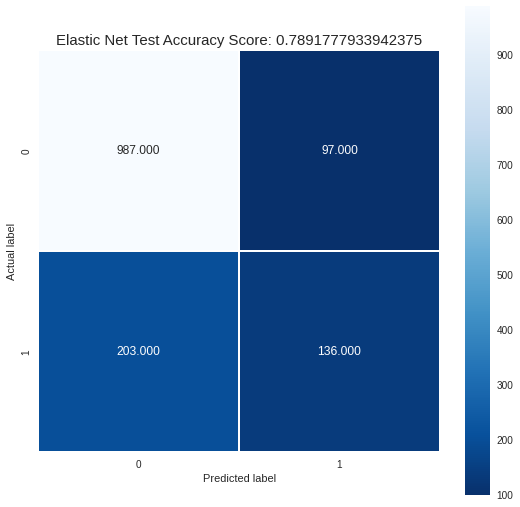

In [68]:
# ElasticNet confusion matrix 
elasticnet_cm = metrics.confusion_matrix(y_test, elasticnet_y_test_pred)

plt.figure(figsize=(9,9))
sns.heatmap(elasticnet_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Elastic Net Test Accuracy Score: {0}'.format(accuracy_score(y_test, elasticnet_y_test_pred))
plt.title(all_sample_title, size = 15)

In [69]:
#Elastic CV
distributions_es = dict(penalty=['elasticnet'], alpha=[.00001, .0001, .001, .01, .1, 1, 2, 5, 10, 20, 50, 100])
clf_es = RandomizedSearchCV(elasticnet, distributions_es, random_state=0)
search_es = clf_es.fit(X_std_train, y_train)

cv_params=search_es.best_params_
alpha_cv = cv_params.get('alpha')

In [70]:
#ElasticNet with CV
elasticnet_cv = SGDClassifier(loss="log", penalty="elasticnet", alpha=alpha_cv)
elasticnet_cv.fit(X_std_train, y_train)

elasticnet_cv_y_test_pred = elasticnet_cv.predict(X_std_test)
elasticnet_cv_y_train_pred = elasticnet_cv.predict(X_std_train)

elasticnet_cv_train_accuracy_score = accuracy_score(y_train, elasticnet_cv_y_train_pred)
elasticnet_cv_test_accuracy_score = accuracy_score(y_test, elasticnet_cv_y_test_pred)

print("Ridge Train Accuracy: ", elasticnet_cv_train_accuracy_score)
print("Ridge Test Accuracy: " ,elasticnet_cv_test_accuracy_score)

Ridge Train Accuracy:  0.8007730147575545
Ridge Test Accuracy:  0.7969079409697821


Text(0.5, 1.0, 'Elastic Net CV Test Accuracy Score: 0.7969079409697821')

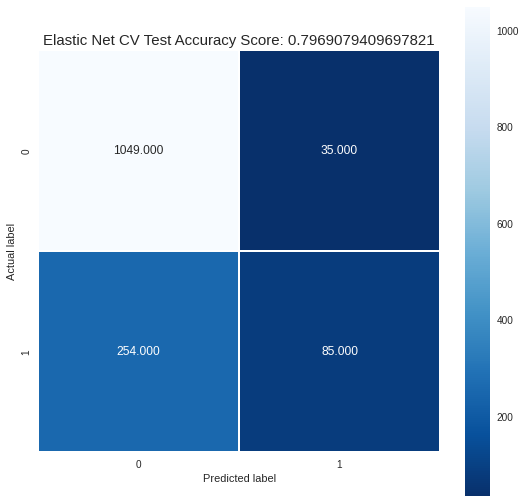

In [71]:
# ElasticNet CV confusion matrix
elasticnet_cv_cm = metrics.confusion_matrix(y_test, elasticnet_cv_y_test_pred)

plt.figure(figsize=(9,9))
sns.heatmap(ridge_cv_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Elastic Net CV Test Accuracy Score: {0}'.format(accuracy_score(y_test, elasticnet_cv_y_test_pred))
plt.title(all_sample_title, size = 15)

Text(0.5, 1.0, 'Elastic')

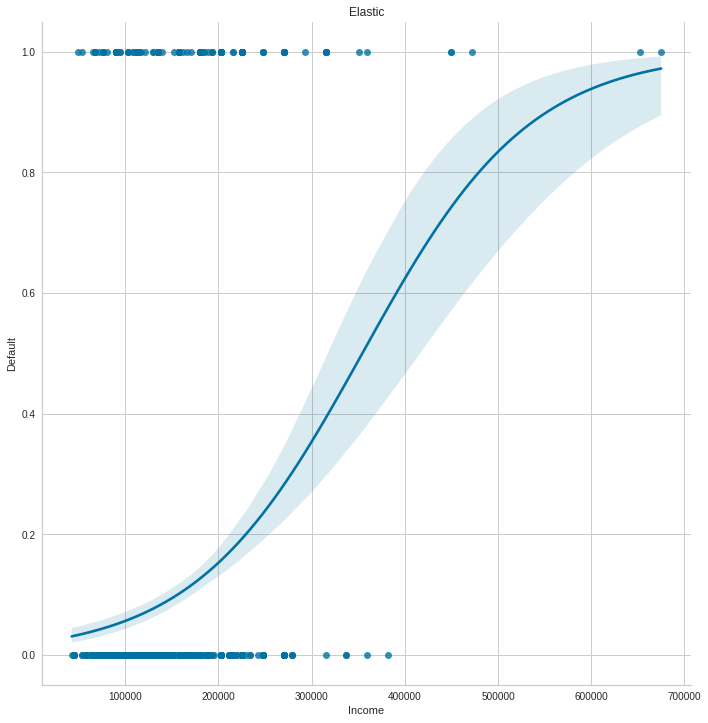

In [72]:
#ElasticNet Visualization
income = pd.DataFrame(X_test['AMT_INCOME_TOTAL'])

income['Default'] = elasticnet_cv_y_test_pred
xy = income
xy.columns = ['Income', 'Default']

g = sns.lmplot(x='Income', y='Default', data=xy, logistic=True, height=10)
plt.title("Elastic")

# Decision Tree

In [73]:
DT_model = DecisionTreeClassifier()

In [74]:
DT_model.fit(X_std_train, y_train)
dt_y_train_pred = DT_model.predict(X_std_train)
dt_y_test_pred = DT_model.predict(X_std_test)

In [75]:
#check accuracy
print('DT Train accuracy: ', accuracy_score(y_train, dt_y_train_pred))
print('DT Test accuracy: ', accuracy_score(y_test, dt_y_test_pred))

DT Train accuracy:  1.0
DT Test accuracy:  0.6092761770906535


In [76]:
#install graphviz and pydot for vizualization
!apt-get -qq install -y graphviz && pip install pydot
import pydot

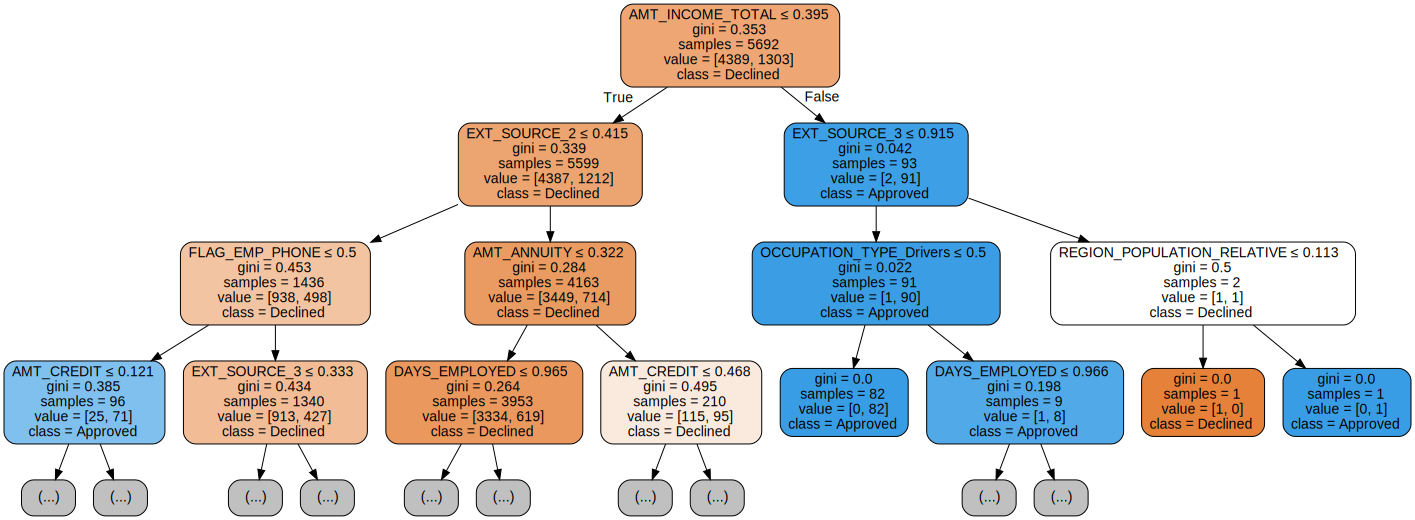

In [77]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(DT_model, max_depth = 3,
                           out_file = None,
                           feature_names = X.columns,
                           class_names = ['Declined', 'Approved'],
                           filled = True, rounded = True,
                           special_characters = True)
graph = graphviz.Source(dot_data)
graph


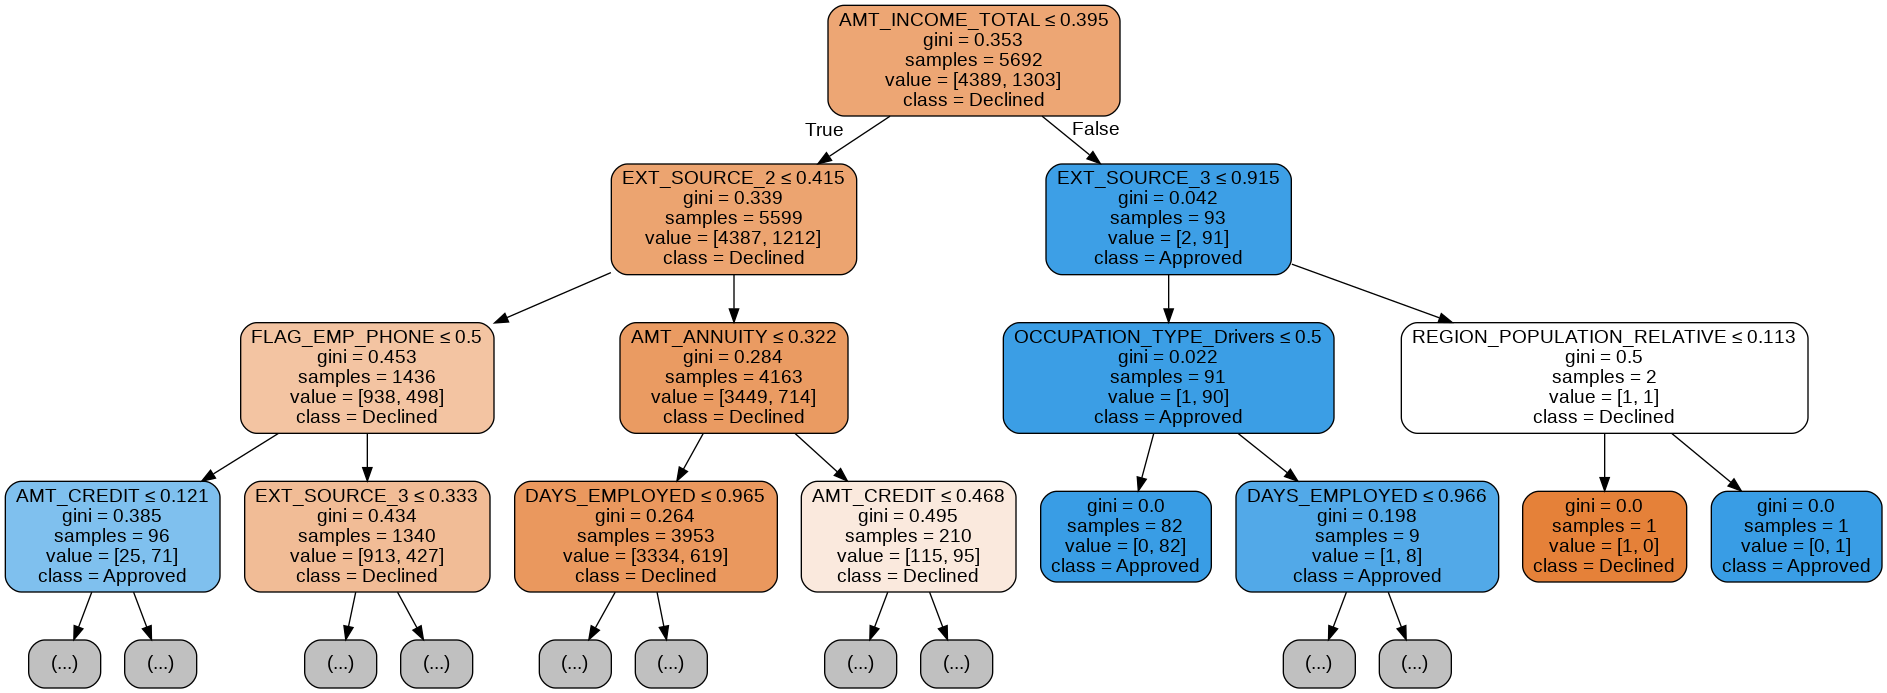

In [78]:
# exporting decision tree into png
graph.format = 'png'
graph.render('dtree_render',view=True)

png_bytes = graph.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(png_bytes)

from IPython.display import Image
Image(png_bytes)

Text(0.5, 1.0, 'Test Accuracy Score: 0.6092761770906535')

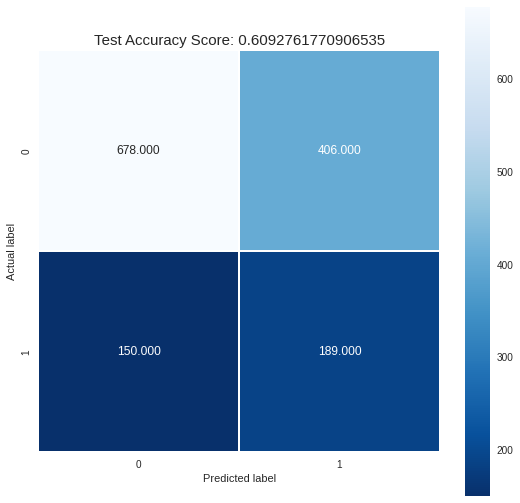

In [79]:
# creating the confusion matrix
y_pred_no_cv = DT_model.predict(X_std_test)
plt.figure(figsize=(9,9))

confusion_matrix_1 = metrics.confusion_matrix(y_test, y_pred_no_cv)
sns.heatmap(confusion_matrix_1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Test Accuracy Score: {0}'.format(accuracy_score(y_test,y_pred_no_cv ))
plt.title(all_sample_title, size = 15)

**Hyperparameter tuning**

In [80]:
from sklearn.model_selection import RandomizedSearchCV

In [81]:
tune_para = {'max_depth' : list(range(3,50)),
            'criterion' : ('gini', 'entropy'),
            'max_features' : ('auto', 'sqrt', 'log2'),
            'min_samples_split' : list(range(1, 282))
             }

In [82]:
DT_randomcv = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions = tune_para, cv = 5, verbose = True, random_state = 42)

In [83]:
DT_randomcv.fit(X_std_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      11, 12, 13, 14, 15, 16,
                                                      17, 18, 19, 20, 21, 22,
                                                      23, 24, 25, 26, 27, 28,
                                                      29, 30, 31, 32, ...],
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10, 11,
                                                              12, 13, 14, 15,
                                                              16, 17, 18, 19,
                      

In [84]:
cv_params = DT_randomcv.best_params_
max_depth_cv = cv_params.get('max_depth')
max_features_cv = cv_params.get('max_features')
min_samples_split_cv = cv_params.get('min_samples_split')

In [85]:
#using parameter from tuning
DT_CVmodel = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth_cv, max_features=max_features_cv,
                       min_samples_split=min_samples_split_cv)

DT_CVmodel.fit(X_std_train,y_train)
DT_CV_y_train_pred = DT_CVmodel.predict(X_std_train)
DT_CV_y_test_pred = DT_CVmodel.predict(X_std_test)

In [86]:
#check accuracy
print('DT CV Train accuracy: ', accuracy_score(y_train, DT_CV_y_train_pred))
print('DT CV Test accuracy: ', accuracy_score(y_test, DT_CV_y_test_pred))

DT CV Train accuracy:  0.800597329585383
DT CV Test accuracy:  0.7336612789880534


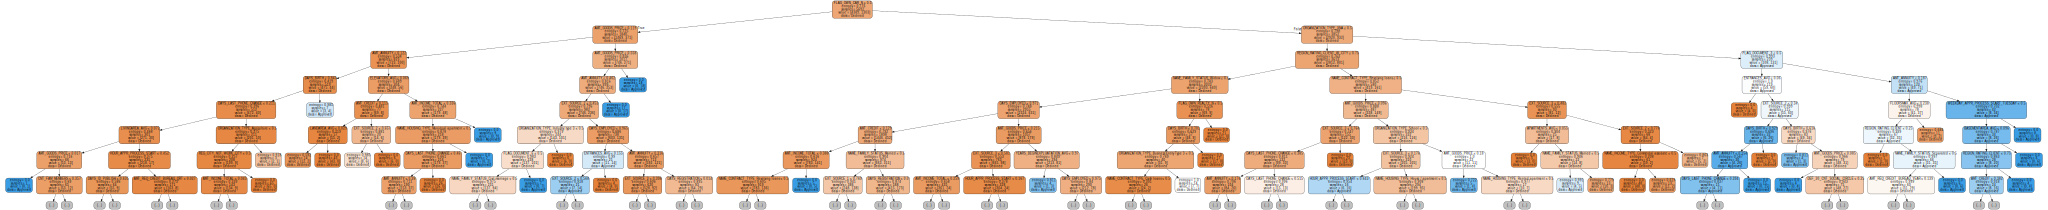

In [87]:
dot_data = export_graphviz(DT_CVmodel, max_depth = 7,
                           out_file = None,
                           feature_names = X.columns,
                           class_names = ['Declined', 'Approved'],
                           filled = True, rounded = True,
                           special_characters = True)
graph_CV = graphviz.Source(dot_data)
graph_CV
#graph.render('Decision Tree After Tuning')

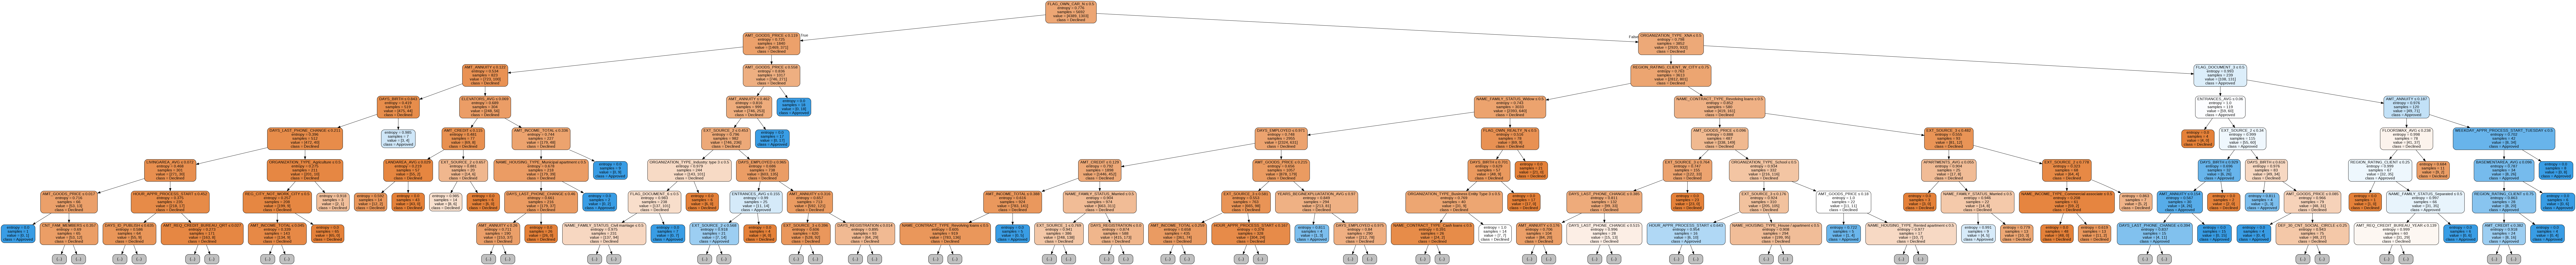

In [88]:
# exporting decision tree to png 
graph_CV.format = 'png'
graph_CV.render('dtree_render',view=True)

png_bytes = graph_CV.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(png_bytes)

from IPython.display import Image
Image(png_bytes)

Text(0.5, 1.0, 'Test Accuracy Score: 0.7336612789880534')

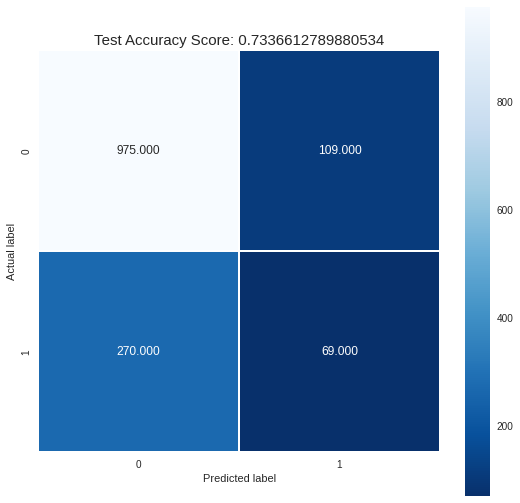

In [89]:
# creating the confusion matrix
y_pred_cv = DT_CVmodel.predict(X_std_test)
plt.figure(figsize=(9,9))

confusion_matrix_2 = metrics.confusion_matrix(y_test, y_pred_cv)
sns.heatmap(confusion_matrix_2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Test Accuracy Score: {0}'.format(accuracy_score(y_test,y_pred_cv ))
plt.title(all_sample_title, size = 15)

# Profit

In [90]:
# make a new dataframe based on the y test/train values
def make_a_df(y_predicted, y_index): 
  idx = y_index.index # all indices 

  # getting all true, predicted, credit 
  everything_with_near_miss = X_under.copy()
  everything_with_near_miss['TARGET'] = y_under
  all_test_df = pd.DataFrame(everything_with_near_miss.iloc[idx])
  all_test_df['Predicted'] = y_predicted
  df2 = pd.DataFrame()
  df2['True'] = all_test_df['TARGET']
  df2['Predicted'] = all_test_df['Predicted']
  df2['Credit'] = all_test_df['AMT_CREDIT']
  df2['Income'] = all_test_df['AMT_INCOME_TOTAL']
  df2['Revolving'] = all_test_df['NAME_CONTRACT_TYPE_Revolving loans']
  df2['Cash'] = all_test_df['NAME_CONTRACT_TYPE_Cash loans']
  df2 = df2.sort_index()


  
  df2['threshold'] = df2['Credit'] / df2['Income']

  conditions = [(df2['threshold'] <= 1),    
                (df2['threshold'] > 1) & (df2['threshold'] <= 1.5),
              (df2['threshold'] > 1.5) & (df2['threshold'] <= 2),
              (df2['threshold'] > 2) & (df2['threshold'] <= 2.5) ,
              (df2['threshold'] > 2.5) & (df2['threshold'] <= 3) ,
              (df2['threshold'] > 3) & (df2['threshold'] <= 4) ,
              (df2['threshold'] > 4) & (df2['threshold'] <= 5) ,
              (df2['threshold'] > 5)       
]

  choices = [1,2,3,4,5,6,7,8]

  df2['risk_rating'] = np.select(conditions, choices)

  rate_conditions = [df2['risk_rating'] == 1,
              df2['risk_rating'] == 2 ,
              df2['risk_rating'] == 3 ,
              df2['risk_rating'] == 4 ,
              df2['risk_rating'] == 5 ,
              df2['risk_rating'] == 6 ,
              df2['risk_rating'] == 7      
]

  rate_choices = [0.05,0.06,0.07,0.08,0.09,0.10,0.12]

  df2['rates'] = np.select(rate_conditions, rate_choices)

  interest_rate = df2['rates'].tolist()
  risk_rating = df2['risk_rating'].tolist()
  true = df2['True'].tolist()
  predicted = df2['Predicted'].tolist()
  credit = df2['Credit'].tolist()
  type_loan_revolv = df2['Revolving'].tolist()

  profit= []
  loss= []
  opp_cost = []
  rate = 0
  diff = 0
  discount = 0

  for i in range(len(predicted)):
    if predicted[i] == 0 and true[i] == 0:
      if type_loan_revolv[i] == 1:
        rate = (1 + interest_rate[i]) ** 7
        diff = (credit[i] * rate) - credit[i]
        profit.append(diff / ((1.02)**7))
      elif type_loan_revolv[i] == 0:
        rate = (1 + interest_rate[i]) ** 3
        diff = (credit[i] * (rate+0.015) - credit[i])
        profit.append(diff / ((1.02)**3))
    elif predicted[i] == 0 and true[i] == 1 :
      if type_loan_revolv[i] == 1:
        diff = -0.5 * credit[i]
        loss.append(diff / ((1.02)**7))
      elif type_loan_revolv[i] == 0:
        diff = -0.7 * credit[i]
        loss.append(diff / ((1.02)**3))
    elif predicted[i] == 1 and true[i] == 0:
        if type_loan_revolv[i] == 1:
          rate = (1 + interest_rate[i]) ** 7
          diff = (credit[i] * rate) - credit[i]
          opp_cost.append(diff / ((1.02)**7))
        elif type_loan_revolv[i] == 0:
          rate = (1 + interest_rate[i]) ** 3
          diff = (credit[i] * (rate+0.015) - credit[i])
          profit.append(diff / ((1.02)**3))


  return sum(profit) - sum(loss)

In [91]:
test_pred_list = [lr_y_test_pred, bagging_y_test_pred, boosting_y_test_pred, 
                  lasso_y_test_pred, ridge_y_test_pred, elasticnet_y_test_pred, 
                  DT_CV_y_test_pred]

model_names = ['Logistic Regression', 'Bagging', 'Boosting', 'Lasso', 
               'Ridge','Elastic Net', 'Decision Tree']

profit = [(model_names[i] + ' Profit: ' + str(make_a_df(test_pred_list[i], y_test))) for i in range(len(model_names))]

profit

['Logistic Regression Profit: 196412946.60466757',
 'Bagging Profit: 168204550.2274397',
 'Boosting Profit: 157415464.47330812',
 'Lasso Profit: 248122576.2437204',
 'Ridge Profit: 203013497.4391882',
 'Elastic Net Profit: 181443225.24904796',
 'Decision Tree Profit: 212958162.0200411']